Matriz A

[[ 7243 -1375 -8227 -4705 -2501]
 [ 8449 -6910  8314 -2664 -7180]
 [ 1736 -5296  8937 -6547 -7537]
 [ 9202  -128 -6385  7309 -3818]
 [ 2536  9080  4586   151 -3745]]

Matriz Q (*)

[[ 0.4906 -0.1087 -0.4529 -0.4116 -0.0901]
 [ 0.5723 -0.546   0.5489 -0.0063  0.7649]
 [ 0.1176 -0.4185  0.5475 -0.4491 -0.1365]
 [ 0.6233 -0.0101 -0.3308  0.7257 -0.0426]
 [ 0.1718  0.7175  0.2905 -0.3197 -0.6216]]

Matriz R (*)

[[14763.754468     0.       -1419.23364    -21.111771 -9245.165333]
 [    0.       12655.003951     0.        4740.105592  4697.962263]
 [    0.           0.       16627.131168     0.       -6759.714019]
 [    0.           0.           0.       10155.393566     0.      ]
 [    0.           0.           0.           0.        5734.290264]]

 Matriz QR-A (erro) (**)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
*resultados arredondados com 6 (** 8) casas decimais para facilitar a leitura


Teste computacional



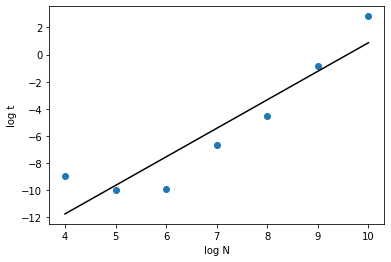

Inclinação da reta:  2.103900675258202 
Então t = O(n ^ 2.1039 )



In [8]:
#Processo de Gram Schimdt

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from scipy import stats
import time

def qr_gramschmidt(A):
    m, n = A.shape
    R = np.zeros((n, n))
    Q = np.empty((m, n))
    R[0, 0] = linalg.norm(A[:, 0])
    Q[:, 0] = A[:, 0] / R[0, 0]
    for k in range(1, n):
        R[:k-1, k] = np.dot(Q[:m, :k-1].T, A[:m, k])
        z = A[:m, k] - np.dot(Q[:m, :k-1], R[:k-1, k])
        R[k, k] = linalg.norm(z)
        Q[:m, k] = z / R[k, k]
    return Q, R

if __name__ == '__main__':
    
    m = 5
    n = 5
    A = np.random.randint(20000,size=(m, n))-10000
    Q, R = qr_gramschmidt(A)
    print('Matriz A\n')
    print(A) #matriz A
    print('\nMatriz Q (*)\n')
    print(Q.round(4)) #matriz Q
    print('\nMatriz R (*)\n')
    print(R.round(6)) #matriz R
    print('\n Matriz QR-A (erro) (**)')
    print((np.dot(Q,R)-A).round(8))
    print('*resultados arredondados com 6 (** 8) casas decimais para facilitar a leitura\n\n')
    print('Teste computacional\n')
    tempo=None
    t = [0]*7
    logN = range(4,11)
    for n in logN:
        A = np.random.randint(20000,size=(2**n, 2**n))-10000
        tempo = time.time()
        Q, R = qr_gramschmidt(A)
        t[n-4] = time.time() - tempo
    logt = np.log2(t)  
    ax = plt.axes()
    ax.set_xlabel('log N')
    ax.set_ylabel('log t')
    plt.scatter(logN,logt)
    slope, intercept, r_value, p_value, std_err = stats.linregress(logN,logt)
    logtreg = [0]*7
    for i in range(0,7):
        logtreg[i] = slope*(i+4) + intercept
    plt.plot(logN,logtreg,color='black')
    plt.show()
    print('Inclinação da reta: ',slope,'\nEntão t = O(n ^',slope.round(4),')\n')


Matriz A
 [[ 5349 -4707 -8933 -6681  3613]
 [-6374   293 -4300  6651  3775]
 [-5010 -6669 -4114  8439  5924]
 [ 1629 -1303 -9625  8050  9492]
 [  878    39 -5586 -8483 -7948]] 


Matriz Q (*)

[[ 5.410e-01  5.982e-01 -1.639e-01 -2.322e-01 -5.184e-01]
 [-6.446e-01 -6.920e-02 -5.378e-01 -1.374e-01 -5.211e-01]
 [-5.067e-01  7.808e-01  2.167e-01  2.310e-02  2.934e-01]
 [ 1.648e-01  1.664e-01 -6.517e-01  6.688e-01  2.704e-01]
 [ 8.880e-02 -1.000e-04 -4.607e-01 -6.924e-01  5.482e-01]]

Matriz R (*)

[[  9887.5832    432.6659  -2057.8244 -11604.874   -2622.5852]
 [     0.      -8260.1083  -9859.1768   3472.4042   8105.3195]
 [     0.          0.      11731.1337  -1992.7256  -3863.8021]
 [    -0.         -0.         -0.      12089.269   10630.5831]
 [    -0.          0.          0.         -0.      -3892.8804]]

 Matriz QR-A (erro) (**)
[[-0.  0.  0.  0. -0.]
 [ 0. -0. -0.  0. -0.]
 [ 0.  0.  0. -0. -0.]
 [-0.  0.  0.  0.  0.]
 [-0.  0.  0.  0. -0.]]
*resultados arredondados com 6 (** 8) casas

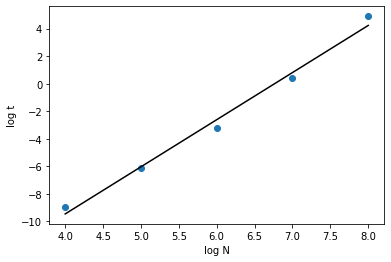

Inclinação da reta:  3.4254337888091104 
Então t = O(n ^ 3.4254 )



In [27]:
#Matriz de Rotação de Givens

import numpy as np
from scipy import linalg
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
from scipy import stats
import time

def montagem_rotGivens(A,i,j):
    n = A.shape[1]
    Pij = np.identity(n)
    if(np.absolute(A[i,j])<0.1e-4):
        theta = np.pi/4
    else:
        theta = np.arctan(A[i,j]/A[j,j])

    Pij[i,i] = np.cos(theta)
    Pij[j,j] = np.cos(theta)
    Pij[i,j] = -np.sin(theta)
    Pij[j,i] = np.sin(theta)
    
    return Pij

def decompor_rotGivens(A):
    n = A.shape[1]
    
    Q = np.identity(n)
    
    for j in range(0,n-1):
        for i in range(j+1,n):
            Pt = montagem_rotGivens(A,i,j)
            
            A = np.dot(Pt,A)
            Q = np.dot(Pt,Q)
            
    return (Q.T , A)

def qr_rotGivens(A, H=None):
    n = A.shape[1]
    R = np.copy(A)
    P = np.identity(n)
    Q = np.empty(n)
    
    if(H != None):
        Pt = H
    i=0
    erro = np.inf
    
    while(erro>0.1e-8 and i < 2):
        Q ,R = decompor_rotGivens(R)            
        A = np.dot(R,Q)
        P = np.dot(P,Q)
        for j in range(0,n-1):
            erro = np.dot(R[j+1:n,j],R[j+1:n,j])
        erro = np.sqrt(erro)
        i = i + 1
    return Q , R


if __name__ == '__main__':
    
    m = 5
    n = 5
    A = np.random.randint(20000,size=(m, n))-10000
    R = np.copy(A)
    print('Matriz A\n',A,'\n')     
    Q ,R = qr_rotGivens(A)
    print('\nMatriz Q (*)\n')
    print(Q.round(4)) #matriz Q
    print('\nMatriz R (*)\n')
    print(R.round(4)) #matriz R
    print('\n Matriz QR-A (erro) (**)')
    print((np.dot(Q,R)-A).round(8))
    print('*resultados arredondados com 6 (** 8) casas decimais para facilitar a leitura\n\n')
    print('Teste computacional\n')
    tempo=None
    t = [0]*5
    logN = range(4,9)
    for n in logN:
        A = np.random.randint(20000,size=(2**n, 2**n))-10000
        tempo = time.time()
        Q, R = qr_rotGivens(A)
        t[n-4] = time.time() - tempo
    logt = np.log2(t)  
    ax = plt.axes()
    ax.set_xlabel('log N')
    ax.set_ylabel('log t')
    plt.scatter(logN,logt)
    slope, intercept, r_value, p_value, std_err = stats.linregress(logN,logt)
    logtreg = [0]*5
    for i in range(0,5):
        logtreg[i] = slope*(i+4) + intercept
    plt.plot(logN,logtreg,color='black')
    plt.show()
    print('Inclinação da reta: ',slope,'\nEntão t = O(n ^',slope.round(4),')\n')

Matriz A 
 [[ -278 -8284 -1536 -5300 -1185]
 [-1750 -9878 -2750 -7577 -2457]
 [ -875 -9179 -3980 -3974 -5538]
 [-3328 -1370 -5826 -1773 -2206]
 [ -219 -3943 -5330 -7434 -8856]]
Matriz R
[[ 3876.72  8523.69  7552.31  6639.37  4838.1 ]
 [   -0.   13972.27  2937.63  9331.16  5841.79]
 [    0.      -0.    4737.75  3628.87  7803.9 ]
 [   -0.       0.      -0.    3921.87   433.47]
 [   -0.       0.      -0.      -0.   -1668.29]] 

Matriz Q
[[-0.07171  -0.549142  0.130601 -0.044288 -0.821147]
 [-0.451413 -0.43159   0.406747 -0.517278  0.420639]
 [-0.225706 -0.519253 -0.158308  0.750729  0.301293]
 [-0.858458  0.425645 -0.125174  0.104314 -0.235216]
 [-0.056491 -0.24774  -0.881346 -0.394951  0.051735]]
Matriz erro

[[ 2.8260e-04  1.3093e-04  4.4850e-04 -1.6716e-04 -9.1520e-05]
 [-3.5200e-05  1.5406e-04  8.6060e-05  6.6091e-04  4.5951e-04]
 [-1.7600e-05 -5.8510e-05 -8.7060e-05 -3.7318e-04 -1.9630e-04]
 [-2.1898e-04  3.8654e-04 -3.4827e-04 -8.0100e-06 -2.6661e-04]
 [ 7.7000e-07 -2.9250e-05 -2.03

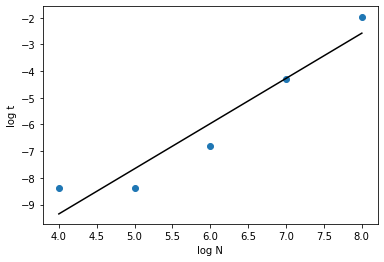

Inclinação da reta:  1.692911465735967 
Então t = O(n ^ 1.6929 )



In [26]:
## Transformação de Householder

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from scipy import stats
import time

def column_convertor(x):
    """
    Converts 1d array to column vector
    """
    x.shape = (1, x.shape[0])
    return x

def householder_transformation(v):
    """
    Returns Householder matrix for vector v
    """
    size_of_v = v.shape[1]
    e1 = np.zeros_like(v)
    e1[0, 0] = 1
    vector = linalg.norm(v) * e1
    if v[0, 0] < 0:
        vector = - vector
    u = (v + vector).astype(np.float32)
    H = np.identity(size_of_v) - ((2 * np.matmul(np.transpose(u), u)) / np.matmul(u, np.transpose(u)))
    return H

def qr_step_factorization(q, r, iter, n):
    """
    Return Q and R matrices for iter number of iterations.
    """
    v = column_convertor(r[iter:, iter])
    Hbar = householder_transformation(v)
    H = np.identity(n)
    H[iter:, iter:] = Hbar
    r = np.matmul(H, r)
    q = np.matmul(q, H)
    return q, r

def main():
    m, n = (5,5)
    A = np.random.randint(10000, size=(m,n))-10000
    print('Matriz A \n', A)
    Q = np.identity(n)
    R = A.astype(np.float32)
    for i in range(min(n, m)):
        Q, R = qr_step_factorization(Q, R, i, n)
    min_dim = min(m, n)
    R = R[:min_dim, :min_dim]

    print('Matriz R')
    print(R.round(2), '\n')
    print('Matriz Q')
    print(Q.round(6))
    print('Matriz erro\n')
    print((A-np.dot(Q,R)).round(8))
    print('\n\nTeste computacional\n')
    tempo=None
    t = [0]*5
    logN = range(4,9)
    for n in logN:
        A = np.random.randint(20000,size=(2**n, 2**n))-10000
        Q = np.identity(2**n)
        R = np.copy(A)

        tempo = time.time()
        for i in range(0,2**n):
            Q, R = qr_step_factorization(Q, R, i, 2**n)
            R = R[:2**n, :2**n]
        t[n-4] = time.time() - tempo
    logt = np.log2(t)  
    ax = plt.axes()
    ax.set_xlabel('log N')
    ax.set_ylabel('log t')
    plt.scatter(logN,logt)
    slope, intercept, r_value, p_value, std_err = stats.linregress(logN,logt)
    logtreg = [0]*5
    for i in range(0,5):
        logtreg[i] = slope*(i+4) + intercept
    plt.plot(logN,logtreg,color='black')
    plt.show()
    print('Inclinação da reta: ',slope,'\nEntão t = O(n ^',slope.round(4),')\n')
    

if __name__ == "__main__":
    main()